In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
N = 10000

In [5]:
ip = np.random.randn(N) > 0

In [6]:
s = 2 * ip - 1

In [7]:
eb_no_db = np.arange(-10,30)

In [8]:
bit_error_RxMF = np.zeros(len(eb_no_db))
bit_error_RxZF = np.zeros(len(eb_no_db))
bit_error_RxWF = np.zeros(len(eb_no_db))

In [9]:
def RxMF():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits = []
        
        for ii in range(N//2):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            H = np.array([[h11, h21],
                          
                        [h21, h22]])
            n1 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n2 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n = np.array([[n1],
                          [n2]])
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            x = np.array([[x1], 
                          [x2]]) 
            
            y = np.dot(H,x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            # forming pseudo inverse for zero forcing
            
            H_conjugate = np.conjugate(H)
            
            H_hermitian = np.transpose(H_conjugate)
            
            covariance_of_signal_Rs = np.eye(2)
            
            covariance_of_noise_Rn= 10 ** (-eb_no_db[jj] / 10) * np.eye(2)
            
            inverse_covariance_of_noise = np.linalg.inv(covariance_of_noise_Rn)
            
            transmit_filter_Prx = np.eye(2)
            
            transmit_filter_conjugate = np.conjugate(transmit_filter_Prx)
            
            transmit_filter_hermitian = np.transpose(transmit_filter_Prx)
            
            alpha = 2
            
            W = alpha * covariance_of_signal_Rs @transmit_filter_hermitian @ H_hermitian @ inverse_covariance_of_noise
            
            x_hat = np.dot(W,y)
            
            received_bits = x_hat > 0
            
            m = received_bits[0,0]
            
            n = received_bits[1,0]
            
            equalize_bits.append(m)
            
            equalize_bits.append(n)
            
        nErr = np.sum(ip != equalize_bits)
        
       
        
        bit_error_RxMF[jj] = nErr/ N
        
        
        
    return bit_error_RxMF

In [10]:
def RxZF():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits = []
        
        for ii in range(N//2):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            H = np.array([[h11, h21],
                          
                        [h21, h22]])
            n1 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n2 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n = np.array([[n1],
                          [n2]])
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            x = np.array([[x1], 
                          [x2]]) 
            
            y =   np.dot(H,x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            # forming pseudo inverse for zero forcing
            
            H_conjugate = np.conjugate(H)
            
            H_hermitian = np.transpose(H_conjugate)
            
            covariance_of_signal_Rs = np.eye(2)
            
            covariance_of_noise_Rn= 10 ** (-eb_no_db[jj] / 10) * np.eye(2)
            
            inverse_covariance_of_noise = np.linalg.inv(covariance_of_noise_Rn)
            
            transmit_filter_Prx = np.eye(2)
            
            transmit_filter_hermitian = np.conjugate(transmit_filter_Prx)
            
            transmit_filter_hermitian = np.transpose(transmit_filter_hermitian)
            
            invertible_matrix = transmit_filter_hermitian @ H_hermitian @ inverse_covariance_of_noise @ H @ transmit_filter_Prx
            
            
            invertible_matrix = np.linalg.inv(invertible_matrix)
            
            multiplier_matrix = transmit_filter_hermitian @ H_hermitian @ inverse_covariance_of_noise
            
            W = np.dot(invertible_matrix,multiplier_matrix)

            x_hat = np.dot(W,y)
            
            received_bits = x_hat > 0
            
            m = received_bits[0,0]
            
            n = received_bits[1,0]
            
            equalize_bits.append(m)
            
            equalize_bits.append(n)
            
        nErr = np.sum(ip != equalize_bits)
        
       
        
        bit_error_RxZF[jj] = nErr/ N
        
        
        
    return bit_error_RxZF
    

In [11]:
def RxWF():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits = []
        
        for ii in range(N//2):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            H = np.array([[h11, h21],
                          
                        [h21, h22]])
            n1 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n2 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n = np.array([[n1],
                          [n2]])
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            x = np.array([[x1], 
                          [x2]]) 
            
            y =  np.dot(H,x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            # forming pseudo inverse for zero forcing
            
            H_conjugate = np.conjugate(H)
            
            H_hermitian = np.transpose(H_conjugate)
            
            covariance_of_signal_Rs = np.eye(2)
            
            inverse_covariance_of_signal_Rs = np.linalg.inv(covariance_of_signal_Rs)
            
            covariance_of_noise_Rn= 10 ** (-eb_no_db[jj] / 10) * np.eye(2)
            
            inverse_covariance_of_noise = np.linalg.inv(covariance_of_noise_Rn)
            
            transmit_filter_Prx = np.eye(2)
            
            transmit_filter_hermitian_PH = np.conjugate(transmit_filter_Prx)
            
            transmit_filter_hermitian_PH = np.transpose(transmit_filter_hermitian_PH)
            
            invertible_matrix = transmit_filter_hermitian_PH @ H_hermitian @ inverse_covariance_of_noise @ H @ transmit_filter_Prx
            
            invertible_matrix = invertible_matrix + inverse_covariance_of_signal_Rs
            
            invertible_matrix = np.linalg.inv(invertible_matrix)
            
            multiplier_matrix = transmit_filter_hermitian_PH @ H_hermitian @ inverse_covariance_of_noise
            
            W = np.dot(invertible_matrix,multiplier_matrix)

            x_hat = np.dot(W,y)
            
            received_bits = x_hat > 0
            
            m = received_bits[0,0]
            
            n = received_bits[1,0]
            
            equalize_bits.append(m)
            
            equalize_bits.append(n)
            
        nErr = np.sum(ip != equalize_bits)
        
       
        
        bit_error_RxWF[jj] = nErr/ N
        
        
        
    return bit_error_RxWF
    

[0.2923 0.2748 0.2474 0.221  0.2084 0.1903 0.1663 0.1476 0.1356 0.1222
 0.1012 0.092  0.0798 0.0738 0.064  0.0571 0.0508 0.0543 0.0452 0.0462
 0.0424 0.0457 0.0424 0.0375 0.0415 0.0373 0.0367 0.0362 0.0378 0.0389
 0.0352 0.0368 0.0373 0.0324 0.0348 0.0385 0.0331 0.0375 0.0364 0.0354]
[3.354e-01 3.250e-01 2.981e-01 2.821e-01 2.592e-01 2.300e-01 2.108e-01
 1.928e-01 1.658e-01 1.416e-01 1.257e-01 1.163e-01 9.340e-02 6.920e-02
 6.340e-02 5.530e-02 4.550e-02 3.210e-02 2.730e-02 2.340e-02 2.090e-02
 1.420e-02 9.900e-03 1.070e-02 6.800e-03 6.500e-03 4.700e-03 3.900e-03
 2.400e-03 1.600e-03 2.100e-03 1.400e-03 7.000e-04 1.200e-03 7.000e-04
 6.000e-04 6.000e-04 3.000e-04 4.000e-04 0.000e+00]
[2.933e-01 2.673e-01 2.403e-01 2.175e-01 1.971e-01 1.832e-01 1.574e-01
 1.317e-01 1.156e-01 1.016e-01 8.450e-02 7.360e-02 5.620e-02 4.480e-02
 3.700e-02 2.620e-02 2.460e-02 2.020e-02 1.540e-02 1.240e-02 1.130e-02
 6.500e-03 5.300e-03 5.000e-03 3.200e-03 2.600e-03 2.400e-03 1.900e-03
 1.600e-03 1.200e-03 8.0

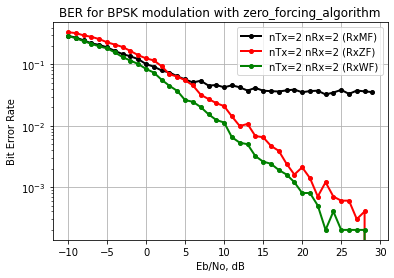

In [12]:
RxMF = RxMF()
print(RxMF)
RxZF = RxZF()
print(RxZF)
RxWF = RxWF()
print(RxWF)
plt.figure()
plt.semilogy(eb_no_db, RxMF, 'ko-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (RxMF)')
plt.semilogy(eb_no_db, RxZF, 'ro-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (RxZF)')
plt.semilogy(eb_no_db, RxWF, 'go-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (RxWF)')
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation with zero_forcing_algorithm')
plt.show()

[0.61306 0.60172 0.589   0.58448 0.5746  0.56374 0.55674 0.5521  0.5452
 0.53722 0.53618 0.53384 0.53038 0.52862 0.52468 0.52176 0.5225  0.52324
 0.52014 0.52036 0.52002 0.51992 0.52008 0.51666 0.51836 0.51974 0.51754
 0.51924 0.51786 0.51776 0.51914 0.51702 0.51594 0.51764 0.51764 0.517
 0.51632 0.51862 0.51744 0.51844]
[0.6406  0.62932 0.61682 0.60524 0.59382 0.58644 0.57374 0.5652  0.5559
 0.5485  0.53856 0.53162 0.5266  0.5224  0.51588 0.51316 0.50654 0.50854
 0.50528 0.50582 0.50358 0.5047  0.49996 0.50182 0.50446 0.50352 0.50282
 0.501   0.50024 0.49752 0.50166 0.50124 0.4997  0.5002  0.49886 0.4993
 0.498   0.5014  0.49848 0.4979 ]
[0.6159  0.60102 0.58956 0.57746 0.57374 0.56008 0.55252 0.5451  0.53608
 0.53254 0.52382 0.51854 0.51328 0.51162 0.50602 0.50834 0.50756 0.50094
 0.50214 0.50368 0.50074 0.49966 0.5048  0.49954 0.50372 0.49986 0.49904
 0.5028  0.50194 0.49996 0.49858 0.50218 0.5028  0.50182 0.49896 0.49852
 0.50074 0.4986  0.49548 0.49308]


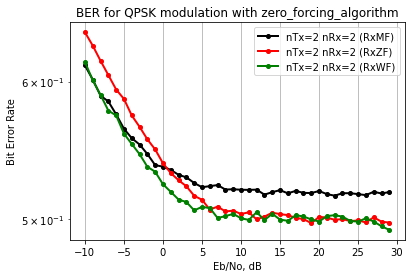

In [59]:
import matplotlib.pyplot as plt
import numpy as np

N =50000
ip = np.random.randn(N) > 0  # QPSK modulation
qpsk_mapping = {
    0: 1 + 1j,
    1: -1 + 1j,
    2: -1 - 1j,
    3: 1 - 1j
}
s = np.array([qpsk_mapping[i] for i in ip])
eb_no_db = np.arange(-10,30)

bit_error_RxMF = np.zeros(len(eb_no_db))
bit_error_RxZF = np.zeros(len(eb_no_db))
bit_error_RxWF = np.zeros(len(eb_no_db))


def RxMF():

    for jj in range(len(eb_no_db)):

        nErr = 0

        equalize_bits = []

        for ii in range(N // 2):

            h11 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h12 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h21 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h22 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            H = np.array([[h11, h21],
                          [h21, h22]])

            n1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            n2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            n = np.array([[n1],
                          [n2]])

            x1 = s[2 * ii]
            x2 = s[2 * ii + 1]
            x = np.array([[x1],
                          [x2]])

            y = np.dot(H, x) + n * (10 ** (-eb_no_db[jj] / 20))

            # forming pseudo inverse for zero forcing
            H_conjugate = np.conjugate(H)
            H_hermitian = np.transpose(H_conjugate)
            covariance_of_signal_Rs = np.eye(2)
            covariance_of_noise_Rn = 10 ** (-eb_no_db[jj] / 10) * np.eye(2)
            inverse_covariance_of_noise = np.linalg.inv(covariance_of_noise_Rn)
            transmit_filter_Prx = np.eye(2)
            transmit_filter_hermitian = np.conjugate(transmit_filter_Prx)
            transmit_filter_hermitian = np.transpose(transmit_filter_hermitian)
            alpha = 2
            W = alpha * covariance_of_signal_Rs @ transmit_filter_hermitian @ H_hermitian @ inverse_covariance_of_noise
            x_hat = np.dot(W, y)
            received_symbols = np.angle(x_hat) / (np.pi / 4)
            
            received_bits = np.floor((received_symbols + 1) / 2).astype(int)
            
            equalize_bits.extend(received_bits.flatten())

        nErr = np.sum(ip != equalize_bits)
        bit_error_RxMF[jj] = nErr / N

    return bit_error_RxMF


def RxZF():

    for jj in range(len(eb_no_db)):

        nErr = 0

        equalize_bits = []

        for ii in range(N // 2):

            h11 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h12 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h21 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h22 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            H = np.array([[h11, h21],
                          [h21, h22]])

            n1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            n2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            n = np.array([[n1],
                          [n2]])

            x1 = s[2 * ii]
            x2 = s[2 * ii + 1]
            x = np.array([[x1],
                          [x2]])

            y = np.dot(H, x) + n * (10 ** (-eb_no_db[jj] / 20))

            # forming pseudo inverse for zero forcing
            H_conjugate = np.conjugate(H)
            H_hermitian = np.transpose(H_conjugate)
            covariance_of_signal_Rs = np.eye(2)
            covariance_of_noise_Rn = 10 ** (-eb_no_db[jj] / 10) * np.eye(2)
            inverse_covariance_of_noise = np.linalg.inv(covariance_of_noise_Rn)
            transmit_filter_Prx = np.eye(2)
            transmit_filter_hermitian = np.conjugate(transmit_filter_Prx)
            transmit_filter_hermitian = np.transpose(transmit_filter_hermitian)
            invertible_matrix = transmit_filter_hermitian @ H_hermitian @ inverse_covariance_of_noise @ H @ transmit_filter_Prx
            invertible_matrix = np.linalg.inv(invertible_matrix)
            multiplier_matrix = transmit_filter_hermitian @ H_hermitian @ inverse_covariance_of_noise
            W = np.dot(invertible_matrix, multiplier_matrix)
            x_hat = np.dot(W, y)
            received_symbols = np.angle(x_hat) / (np.pi / 4)
            received_bits = np.floor((received_symbols + 1) / 2).astype(int)
            equalize_bits.extend(received_bits.flatten())

        nErr = np.sum(ip != equalize_bits)
        bit_error_RxZF[jj] = nErr / N

    return bit_error_RxZF


def RxWF():

    for jj in range(len(eb_no_db)):

        nErr = 0

        equalize_bits = []

        for ii in range(N // 2):

            h11 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h12 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h21 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h22 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            H = np.array([[h11, h21],
                          [h21, h22]])

            n1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            n2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            n = np.array([[n1],
                          [n2]])

            x1 = s[2 * ii]
            x2 = s[2 * ii + 1]
            x = np.array([[x1],
                          [x2]])

            y = np.dot(H, x) + n * (10 ** (-eb_no_db[jj] / 20))

            # forming pseudo inverse for zero forcing
            H_conjugate = np.conjugate(H)
            H_hermitian = np.transpose(H_conjugate)
            covariance_of_signal_Rs = np.eye(2)
            inverse_covariance_of_signal_Rs = np.linalg.inv(covariance_of_signal_Rs)
            covariance_of_noise_Rn = 10 ** (-eb_no_db[jj] / 10) * np.eye(2)
            inverse_covariance_of_noise = np.linalg.inv(covariance_of_noise_Rn)
            transmit_filter_Prx = np.eye(2)
            transmit_filter_hermitian_PH = np.conjugate(transmit_filter_Prx)
            transmit_filter_hermitian_PH = np.transpose(transmit_filter_hermitian_PH)
            invertible_matrix = transmit_filter_hermitian_PH @ H_hermitian @ inverse_covariance_of_noise @ H @ transmit_filter_Prx
            invertible_matrix = invertible_matrix + inverse_covariance_of_signal_Rs
            invertible_matrix = np.linalg.inv(invertible_matrix)
            multiplier_matrix = transmit_filter_hermitian_PH @ H_hermitian @ inverse_covariance_of_noise
            W = np.dot(invertible_matrix, multiplier_matrix)
            x_hat = np.dot(W, y)
            received_symbols = np.angle(x_hat) / (np.pi / 4)
            
            received_bits = np.floor((received_symbols + 1) / 2).astype(int)
            
            equalize_bits.extend(received_bits.flatten())

        nErr = np.sum(ip != equalize_bits)
        bit_error_RxWF[jj] = nErr / N

    return bit_error_RxWF

RxMF = RxMF()
print(RxMF)
RxZF = RxZF()
print(RxZF)
RxWF = RxWF()
print(RxWF)
plt.figure()
plt.semilogy(eb_no_db, RxMF, 'ko-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (RxMF)')
plt.semilogy(eb_no_db, RxZF, 'ro-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (RxZF)')
plt.semilogy(eb_no_db, RxWF, 'go-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (RxWF)')
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for QPSK modulation with zero_forcing_algorithm')
plt.show()
